In [1]:
import ROOT 
import uproot
import numpy  as np
import pandas as pd
import matplotlib.pyplot as plt

Welcome to JupyROOT 6.18/04


In [2]:
jet_PUPPI_events  = uproot.open('TTJets_DiLept_TuneCUETP8M1_14TeV-madgraphMLM-pythia8_200PU_1.root')['Delphes']['JetPUPPI']
jet_PUPPI_eta     = jet_PUPPI_events['JetPUPPI.Eta'].array()
jet_PUPPI_phi     = jet_PUPPI_events['JetPUPPI.Phi'].array()
jet_PUPPI_pt      = jet_PUPPI_events['JetPUPPI.PT'].array()
jet_PUPPI_btag    = jet_PUPPI_events['JetPUPPI.BTag'].array() 
jet_PUPPI_mass    = jet_PUPPI_events['JetPUPPI.Mass'].array() 
jet_PUPPI_charge  = jet_PUPPI_events['JetPUPPI.Charge'].array() 

In [3]:
electron_CHS_events  = uproot.open('TTJets_DiLept_TuneCUETP8M1_14TeV-madgraphMLM-pythia8_200PU_1.root')['Delphes']['ElectronCHS']
electron_CHS_eta     = electron_CHS_events['ElectronCHS.Eta'].array()
electron_CHS_phi     = electron_CHS_events['ElectronCHS.Phi'].array()
electron_CHS_pt      = electron_CHS_events['ElectronCHS.PT'].array()
electron_CHS_charge  = electron_CHS_events['ElectronCHS.Charge'].array()

In [4]:
muon_CHS_events  = uproot.open('TTJets_DiLept_TuneCUETP8M1_14TeV-madgraphMLM-pythia8_200PU_1.root')['Delphes']['MuonTightCHS']
muon_CHS_eta     = muon_CHS_events['MuonTightCHS.Eta'].array()
muon_CHS_phi     = muon_CHS_events['MuonTightCHS.Phi'].array()
muon_CHS_pt      = muon_CHS_events['MuonTightCHS.PT'].array()
muon_CHS_charge  = muon_CHS_events['MuonTightCHS.Charge'].array()

In [5]:
met_events  = uproot.open('TTJets_DiLept_TuneCUETP8M1_14TeV-madgraphMLM-pythia8_200PU_1.root')['Delphes']['PuppiMissingET']
met_pt      = met_events['PuppiMissingET.MET'].array()

In [6]:
tt_event_count    = uproot.open('emu_ttbarsignalplustau.root')['weightedEvents']
tt_events_reco    = uproot.open('emu_ttbarsignalplustau.root')['ttBar_treeVariables_step8']

tt_l_pt           = tt_events_reco['l_pt'].array()
tt_l_eta          = tt_events_reco['l_eta'].array()
tt_l_phi          = tt_events_reco['l_phi'].array()

tt_lbar_pt        = tt_events_reco['lbar_pt'].array()
tt_lbar_eta       = tt_events_reco['lbar_eta'].array()
tt_lbar_phi       = tt_events_reco['lbar_phi'].array()

tt_b_pt           = tt_events_reco['b_pt'].array()
tt_b_eta          = tt_events_reco['b_eta'].array()
tt_b_phi          = tt_events_reco['b_phi'].array()

tt_bbar_pt        = tt_events_reco['bbar_pt'].array()
tt_bbar_eta       = tt_events_reco['bbar_eta'].array()
tt_bbar_phi       = tt_events_reco['bbar_phi'].array()

tt_llbar_dphi     = tt_events_reco['llbar_delta_phi'].array()
tt_llbar_deta     = tt_events_reco['llbar_delta_eta'].array()

tt_bbbar_pt       = tt_events_reco['bbbar_pt'].array()
tt_bbbar_dphi     = tt_events_reco['bbbar_delta_phi'].array()
tt_bbbar_deta     = tt_events_reco['bbbar_delta_eta'].array()

tt_met_pt         = tt_events_reco['met_pt'].array()
tt_event_weight   = tt_events_reco['eventWeight'].array()

In [7]:
met   = []

l_pt  = []
l_eta = []
l_phi = []

al_pt  = []
al_eta = []
al_phi = []

ljet_pt  = []
ljet_eta = []
ljet_phi = []
ljet_mass = []

sljet_pt  = []
sljet_eta = []
sljet_phi = []
sljet_mass = []

In [8]:
#Loop over the events 
for i in range(len(jet_PUPPI_pt)) :
             
    e_index   = 0
    mu_index  = 0   

    e_charge  = 1
    mu_charge = 1
    
    e_count   = 0 
    mu_count  = 0
    
    # Ensure pt > 30 GeV and eta < 2.5
    for j in range(len(electron_CHS_pt[i])) :
        if (electron_CHS_pt[i][j] > 30) and (abs(electron_CHS_eta[i][j]) < 2.5 and e_count == 0 ):                               
            e_index    = j
            e_charge   = electron_CHS_charge[i][j]
            e_count += 1
            
    # Ensure pt > 30 GeV and eta < 2.5        
    for j in range(len(muon_CHS_pt[i])) :            
        if (muon_CHS_pt[i][j] > 30) and (abs(muon_CHS_eta[i][j]) < 2.5 and mu_count == 0):                               
            mu_index   = j
            mu_charge  = muon_CHS_charge[i][j]
            mu_count += 1
    
    # Opp sign
    if e_charge * mu_charge != -1 : continue
        
    # Dilepton cut
    if e_count + mu_count  != 2 : continue  

    # MET 
    #if (g_met_pt[i] < 40) : continue
        
    # Jets
    if (len(jet_PUPPI_pt[i]) > 1) :
        # Jet cuts 
        if ( (jet_PUPPI_pt [i][1]  > 30) and (abs(jet_PUPPI_eta[i][0]) < 2.5) and (abs(jet_PUPPI_eta[i][1]) < 2.5) ) :
            
            ljet_pt.append(jet_PUPPI_pt[i][0])
            ljet_phi.append(jet_PUPPI_phi[i][0])
            ljet_eta.append(jet_PUPPI_eta[i][0])
            ljet_mass.append(jet_PUPPI_eta[i][0])
            
            sljet_pt.append(jet_PUPPI_pt[i][1])
            sljet_phi.append(jet_PUPPI_phi[i][1]) 
            sljet_eta.append(jet_PUPPI_eta[i][1]) 
            sljet_mass.append(jet_PUPPI_eta[i][1])        
            
            if (e_charge == 1 and mu_charge == -1) :
                l_pt.append(electron_CHS_pt[i][e_index])
                l_phi.append(electron_CHS_phi[i][e_index])
                l_eta.append(electron_CHS_eta[i][e_index])
                
                al_pt.append(muon_CHS_pt[i][mu_index])
                al_phi.append(muon_CHS_phi[i][mu_index])
                al_eta.append(muon_CHS_eta[i][mu_index])
                
            elif (e_charge == -1 and mu_charge == 1) :
                al_pt.append(electron_CHS_pt[i][e_index])
                al_phi.append(electron_CHS_phi[i][e_index])
                al_eta.append(electron_CHS_eta[i][e_index])
            
                l_pt.append(muon_CHS_pt[i][mu_index])
                l_phi.append(muon_CHS_phi[i][mu_index])
                l_eta.append(muon_CHS_eta[i][mu_index])
                
            met.append(met_pt[i][0])
        else : continue

In [26]:
bbbar_deta = abs(np.array(ljet_eta) -  np.array(sljet_eta))
bbbar_dphi = abs(abs(abs(np.array(ljet_phi) -  np.array(sljet_phi)) - np.pi) - np.pi)

In [27]:
#jet_dR = (ljet_phi - sljet_phi)** 2       + (ljet_eta - sljet_eta)** 2 

In [28]:
llbar_deta = abs(np.array(l_eta) -  np.array(al_eta))
llbar_dphi = abs(abs(abs(np.array(l_phi) -  np.array(al_phi)) - np.pi) - np.pi)

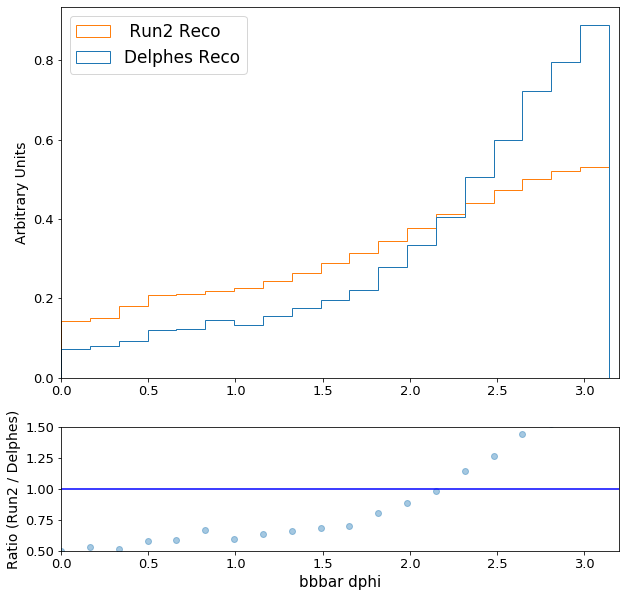

In [29]:
binning = np.linspace(0,np.pi,20)

fig_style = {
    'figsize': (10, 10),
}

ratio_fig_style = {
    'figsize': (10, 10),
    'gridspec_kw': {'height_ratios': (3, 1)},
}

y = []
y.append(bbbar_dphi)
y.append(tt_bbbar_dphi)

fig, (ax1, ax2) = plt.subplots(nrows=2, **ratio_fig_style)
ns, bins, patches = ax1.hist(y, density=True,
                      histtype='step',
                      bins=binning,
                      label=['Delphes Reco',' Run2 Reco']
                      )
ax1.legend(prop={'size': 17}, loc='upper left')
ax1.set_xlim(0,3.2)
ax2.scatter(bins[:-1],     # this is what makes it comparable
        ns[0] / ns[1],     # maybe check for div-by-zero!
        alpha=0.4)

ax1.set_ylabel('Arbitrary Units', fontsize=14)
#ax1.set_ylim(0,0.5)
ax2.set_ylabel('Ratio (Run2 / Delphes)', fontsize=14)
ax2.set_xlabel('bbbar dphi', fontsize=15)
ax2.set_ylim(0.5,1.5)
ax2.set_xlim(0,3.2)

ax1.tick_params(axis="x", labelsize=13)
ax2.tick_params(axis="x", labelsize=13)

ax1.tick_params(axis="y", labelsize=13)
ax2.tick_params(axis="y", labelsize=13)

plt.axhline(y=1, color='b', linestyle='-')
plt.show()

In [21]:
bbbar_pt = []

for i in range(len(ljet_pt)) :
    lj_4vec = ROOT.TLorentzVector()
    lj_4vec.SetPtEtaPhiM(ljet_pt[i], ljet_eta[i], ljet_phi[i], ljet_mass[i])
    
    slj_4vec = ROOT.TLorentzVector()
    slj_4vec.SetPtEtaPhiM(sljet_pt[i], sljet_eta[i], sljet_phi[i], sljet_mass[i])
    
    bb_4vec = lj_4vec + slj_4vec
    bbbar_pt.append(bb_4vec.Pt())

In [22]:
llbar_deta = abs(np.array(l_eta) -  np.array(al_eta))
llbar_dphi = abs(abs(abs(np.array(l_phi) -  np.array(al_phi)) - np.pi) - np.pi)

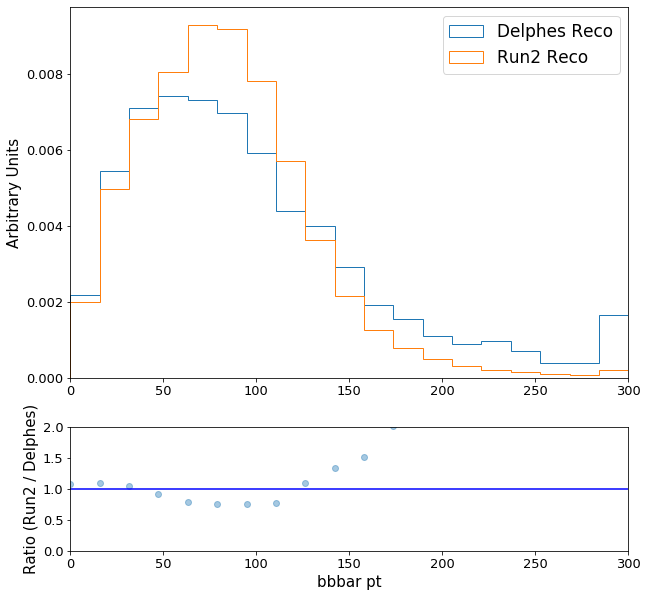

In [24]:
bins = np.linspace(0,300, 20)

fig_style = {
    'figsize': (10, 10),
}

ratio_fig_style = {
    'figsize': (10, 10),
    'gridspec_kw': {'height_ratios': (3, 1)},
}


fig, (ax1, ax2) = plt.subplots(nrows=2, **ratio_fig_style)
ns1, bins1, patches  = ax1.hist(np.clip(bbbar_pt,  bins[0], bins[-1]),  density=True, histtype='step', bins=bins , label='Delphes Reco')
ns2, bins2, patches  = ax1.hist(np.clip(tt_bbbar_pt, bins[0], bins[-1]), density=True , histtype='step', bins=bins , label='Run2 Reco')

ax1.legend(prop={'size': 17}, loc='upper right')
ax1.set_xlim(0, 300)
ax2.scatter(bins[:-1],     # this is what makes it comparable
        ns1 / ns2,     # maybe check for div-by-zero!
        alpha=0.4)

ax1.set_ylabel('Arbitrary Units', fontsize=15)
ax2.set_ylabel('Ratio (Run2 / Delphes)', fontsize=15)
ax2.set_xlabel('MET', fontsize=15)
ax2.set_ylim(0,2)
ax2.set_xlim(0,300)

ax1.tick_params(axis="x", labelsize=13)
ax2.tick_params(axis="x", labelsize=13)

ax1.tick_params(axis="y", labelsize=13)
ax2.tick_params(axis="y", labelsize=13)
plt.axhline(y=1, color='b', linestyle='-')
plt.show()

In [25]:
tt_bl_dR       = (tt_b_phi - tt_l_phi)** 2       + (tt_b_eta - tt_l_eta)** 2 
tt_blbar_dR    = (tt_b_phi - tt_lbar_phi)** 2    + (tt_b_eta - tt_lbar_eta)** 2 
tt_bbarl_dR    = (tt_bbar_phi - tt_l_phi)** 2    + (tt_bbar_eta - tt_l_eta)** 2 
tt_bbarlbar_dR = (tt_bbar_phi - tt_lbar_phi)** 2 + (tt_bbar_eta - tt_lbar_eta)** 2 

tt_dR = np.sqrt(tt_bl_dR + tt_blbar_dR + tt_bbarl_dR + tt_bbarlbar_dR)

In [46]:
l_eta = np.array(l_eta)
l_phi = np.array(l_phi)

al_eta = np.array(al_eta)
al_phi = np.array(al_phi)

ljet_eta = np.array(ljet_eta)
ljet_phi = np.array(ljet_phi)

sljet_eta = np.array(sljet_eta)
sljet_phi = np.array(sljet_phi)

bl_dR       = (ljet_phi - l_phi)** 2    + (ljet_eta - l_eta)** 2 
blbar_dR    = (ljet_phi - al_phi)** 2   + (ljet_eta - al_eta)** 2 
bbarl_dR    = (sljet_phi - l_phi)** 2   + (sljet_eta - l_eta)** 2 
bbarlbar_dR = (sljet_phi - al_phi)** 2  + (sljet_eta - al_eta)** 2 

dR = np.sqrt(bl_dR + blbar_dR + bbarl_dR + bbarlbar_dR)

/Users/amandeepsinghbakshi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:25: RuntimeWarning: divide by zero encountered in true_divide
/Users/amandeepsinghbakshi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:25: RuntimeWarning: invalid value encountered in true_divide


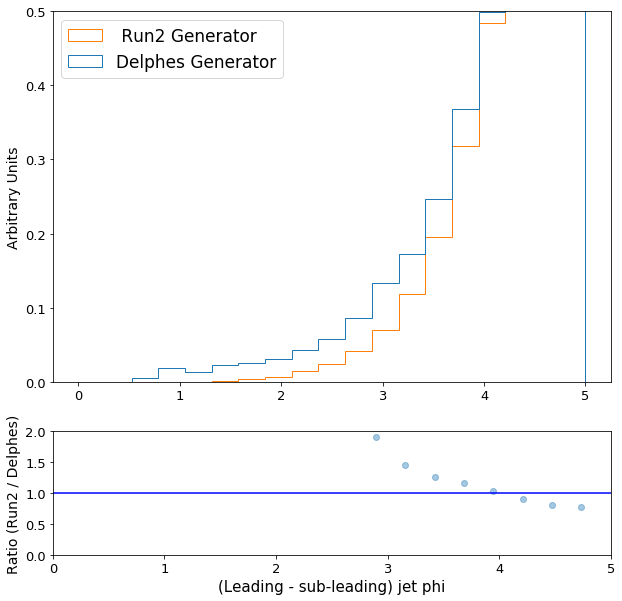

In [24]:
binning = np.linspace(0,5, 20)

fig_style = {
    'figsize': (10, 10),
}

ratio_fig_style = {
    'figsize': (10, 10),
    'gridspec_kw': {'height_ratios': (3, 1)},
}

y = []
y.append(dR)
y.append(tt_dR)

fig, (ax1, ax2) = plt.subplots(nrows=2, **ratio_fig_style)
ns, bins, patches = ax1.hist(y, density=True,
                      histtype='step',
                      bins=binning,
                      label=['Delphes Generator',' Run2 Generator']
                      )
ax1.legend(prop={'size': 17}, loc='upper left')
#ax1.set_xlim(0, 5)
ax2.scatter(bins[:-1],     # this is what makes it comparable
        ns[0] / ns[1],     # maybe check for div-by-zero!
        alpha=0.4)

ax1.set_ylabel('Arbitrary Units', fontsize=14)
ax1.set_ylim(0,0.5)
ax2.set_ylabel('Ratio (Run2 / Delphes)', fontsize=14)
ax2.set_xlabel('(Leading - sub-leading) jet phi', fontsize=15)
ax2.set_ylim(0,2)
ax2.set_xlim(0,5)

ax1.tick_params(axis="x", labelsize=13)
ax2.tick_params(axis="x", labelsize=13)

ax1.tick_params(axis="y", labelsize=13)
ax2.tick_params(axis="y", labelsize=13)

plt.axhline(y=1, color='b', linestyle='-')

In [9]:
#Loop over the events 
for i in range(len(gen_part_pt)) :
             
    l_index   = 0
    al_index  = 0   
    lep_count = 0 
    
    # Loop over the gen particles, no need for the whole charade 
    for j in range(40) :               
        if (gen_part_pid[i][j] == 11  and gen_part_pid[i][j+1] == -12):                      
            l_index   = j
            lep_count += 1
                
        if (gen_part_pid[i][j] == -13 and gen_part_pid[i][j+1] == 14):
            al_index = j
            lep_count += 1
    
    # Dilepton cut
    if lep_count != 2 : continue  
        
    # Jets
    if (len(gen_jet_pt[i]) > 1) :
        # Jet cuts     
        ljet_pt.append(gen_jet_pt[i][0])
        ljet_phi.append(gen_jet_phi[i][0])
        ljet_eta.append(gen_jet_eta[i][0])
            
        sljet_pt.append(gen_jet_pt[i][1])
        sljet_phi.append(gen_jet_phi[i][1]) 
        sljet_eta.append(gen_jet_eta[i][1]) 
            
        l_pt.append(gen_part_pt[i][l_index])
        l_phi.append(gen_part_phi[i][l_index])
        l_eta.append(gen_part_eta[i][l_index])
            
        al_pt.append(gen_part_pt[i][al_index])
        al_phi.append(gen_part_phi[i][al_index])
        al_eta.append(gen_part_eta[i][al_index])
            
    else : continue


In [14]:
#Loop over the events 
for i in range(len(gen_part_pt)) :
             
    l_index   = 0
    al_index  = 0   
    lep_count = 0 
    
    # Loop over the gen particles, no need for the whole charade 
    for j in range(40) :    
        # Ensure pt > 30 GeV and eta < 2.5
        if (gen_part_pt[i][j] > 30) and (abs(gen_part_eta[i][j]) < 2.5):            
            if (gen_part_pid[i][j] == 11  and gen_part_pid[i][j+1] == -12) :                      
                l_index   = j
                lep_count += 1
                
            if (gen_part_pid[i][j] == -13 and gen_part_pid[i][j+1] == 14):
                al_index = j
                lep_count += 1
                
        else : continue
    
    # Dilepton cut
    if lep_count != 2 : continue  

    # MET 
    if (gen_met_pt[i] < 40) : continue
        
    # Jets
    if (len(gen_jet_pt[i]) > 1) :
        # Jet cuts 
        if (gen_jet_pt[i][1]  > 30 and abs(gen_jet_eta[i][0]) < 2.5 and abs(gen_jet_eta[i][1]) < 2.5 ) :
            
            ljet_pt.append(gen_jet_pt[i][0])
            ljet_phi.append(gen_jet_phi[i][0])
            ljet_eta.append(gen_jet_eta[i][0])
            
            sljet_pt.append(gen_jet_pt[i][1])
            sljet_phi.append(gen_jet_phi[i][1]) 
            sljet_eta.append(gen_jet_eta[i][1]) 
            
            l_pt.append(gen_part_pt[i][l_index])
            l_phi.append(gen_part_phi[i][l_index])
            l_eta.append(gen_part_eta[i][l_index])
            
            al_pt.append(gen_part_pt[i][al_index])
            al_phi.append(gen_part_phi[i][al_index])
            al_eta.append(gen_part_eta[i][al_index])
            
    else : continue


In [10]:
jet_pt = [ljet_pt, sljet_pt]
jet_pt = np.array(jet_pt)
jet_pt = jet_pt.flatten()

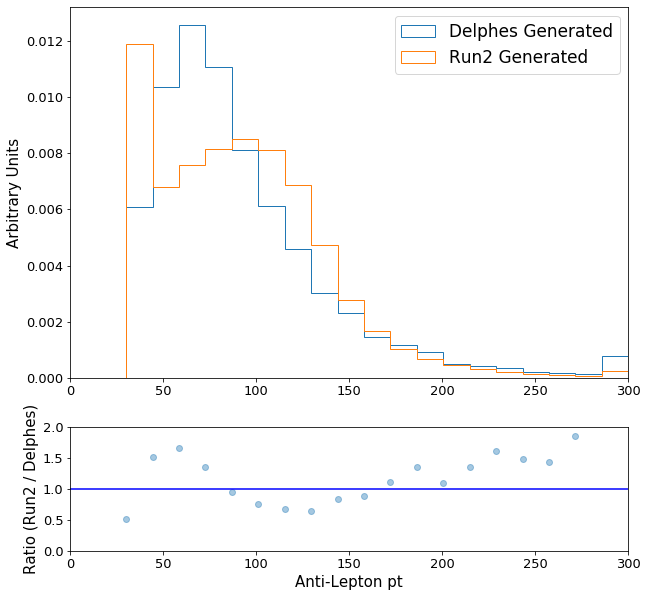

In [13]:
bins = np.linspace(30,300, 20)
fig_style = {
    'figsize': (5, 5),
}

ratio_fig_style = {
    'figsize': (10, 10),
    'gridspec_kw': {'height_ratios': (3, 1)},
}

fig, (ax1, ax2) = plt.subplots(nrows=2, **ratio_fig_style)
ns1, bins1, patches  = ax1.hist(np.clip(jet_pt,  bins[0], bins[-1]),  density=True, histtype='step', bins=bins , label='Delphes Generated')
ns2, bins2, patches  = ax1.hist(np.clip(tt_bbbar_pt, bins[0], bins[-1]), density=True , histtype='step', bins=bins , label='Run2 Generated')

ax1.legend(prop={'size': 17}, loc='upper right')
ax1.set_xlim(0, 300)
ax2.scatter(bins[:-1],     # this is what makes it comparable
        ns1 / ns2,        # maybe check for div-by-zero!
        alpha=0.4)

ax1.set_ylabel('Arbitrary Units', fontsize=15)
ax2.set_ylabel('Ratio (Run2 / Delphes)', fontsize=15)
ax2.set_xlabel('Anti-Lepton pt', fontsize=15)
ax2.set_ylim(0, 2)
ax2.set_xlim(0,300)

ax1.tick_params(axis="x", labelsize=13)
ax2.tick_params(axis="x", labelsize=13)

ax1.tick_params(axis="y", labelsize=13)
ax2.tick_params(axis="y", labelsize=13)

plt.axhline(y=1, color='b', linestyle='-')
plt.show()

In [38]:
jet_pt.shape

(2, 2592)

In [12]:
jet_phi  =  np.array(jet_phi)
ajet_phi =  np.array(ajet_phi)

jet_dphi = (abs(abs(abs(jet_phi - ajet_phi) - np.pi) - np.pi))

In [36]:
jet_eta  =  np.array(jet_eta)
ajet_eta =  np.array(ajet_eta)

jet_deta = abs(jet_eta - ajet_eta)

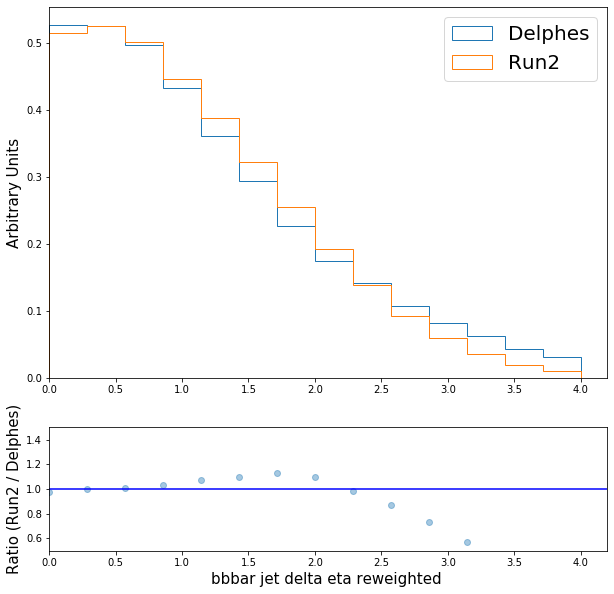

In [42]:
phi_bins = np.linspace(0, 4, 15)

ratio_fig_style = {
    'figsize': (10, 10),
    'gridspec_kw': {'height_ratios': (3, 1)},
}

fig, (ax1, ax2) = plt.subplots(nrows=2, **ratio_fig_style)
ns1, bins1, patches  = ax1.hist(jet_deta,      density=True, histtype='step', bins=phi_bins , label='Delphes', weights=ew)
ns2, bins2, patches  = ax1.hist(tt_bbbar_deta, density=True, histtype='step', bins=phi_bins , label='Run2')

ax1.legend(prop={'size': 20}, loc='upper right')
ax1.set_xlim(0, 4.2)
ax2.scatter(phi_bins[:-1],     # this is what makes it comparable
        ns2 / ns1,     # maybe check for div-by-zero!
        alpha=0.4)

ax1.set_ylabel('Arbitrary Units', fontsize=15)
ax2.set_ylabel('Ratio (Run2 / Delphes)', fontsize=15)
ax2.set_xlabel('bbbar jet delta eta reweighted ', fontsize=15)
ax2.set_ylim(0.5,1.5)
ax2.set_xlim(0,4.2)
plt.axhline(y=1, color='b', linestyle='-')
plt.show()

Text(0, 0.5, 'Arbitrary Units')

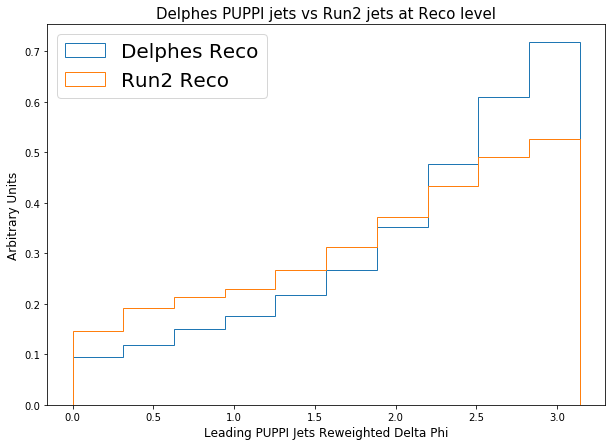

In [15]:
fig_style = {
    'figsize': (10, 7),
}

fig, ax = plt.subplots(**fig_style)

plt.title('Delphes PUPPI jets vs Run2 jets at Reco level', fontsize=15)
plt.hist(jet_dphi, histtype='step', label = 'Delphes Reco', density=True)
plt.hist(tt_bbbar_dphi, histtype='step' , label = 'Run2 Reco', density=True)

ax.legend(prop={'size': 20}, loc='upper left')
plt.xlabel('Leading PUPPI Jets Reweighted Delta Phi', fontsize=12)
plt.ylabel('Arbitrary Units', fontsize=12)

Text(0, 0.5, 'Arbitrary Units')

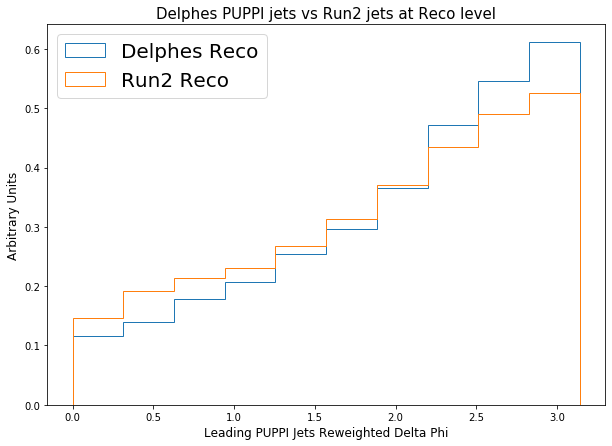

In [16]:
fig_style = {
    'figsize': (10, 7),
}

fig, ax = plt.subplots(**fig_style)

plt.title('Delphes PUPPI jets vs Run2 jets at Reco level', fontsize=15)
plt.hist(jet_dphi, histtype='step', label = 'Delphes Reco', density=True, weights=ew)
plt.hist(tt_bbbar_dphi, histtype='step' , label = 'Run2 Reco', density=True)

ax.legend(prop={'size': 20}, loc='upper left')
plt.xlabel('Leading PUPPI Jets Reweighted Delta Phi', fontsize=12)
plt.ylabel('Arbitrary Units', fontsize=12)

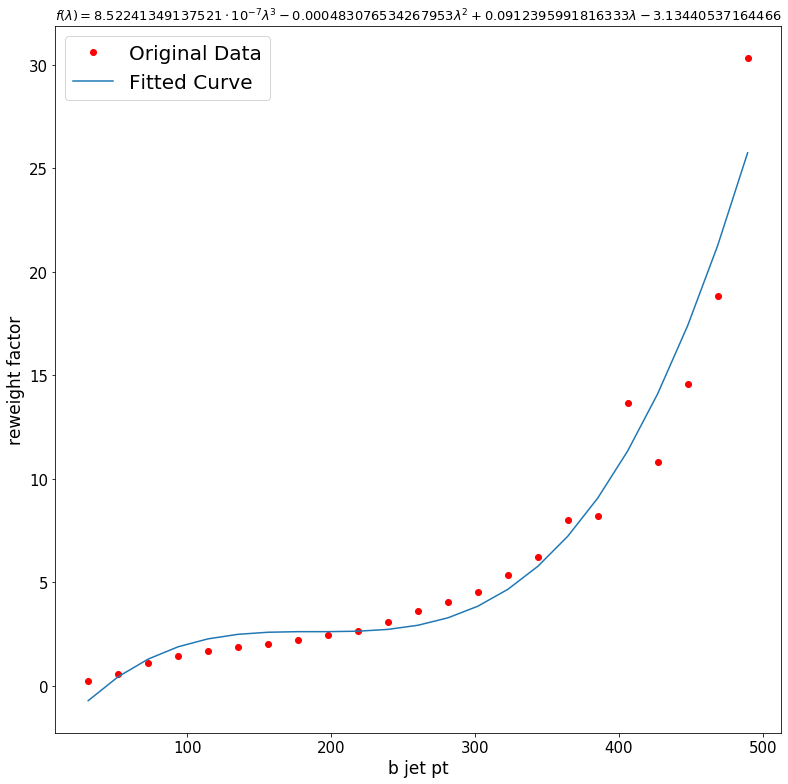

In [16]:
# -*- coding: utf-8 -*-

import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import numpy as np
import sympy as sym


#from matplotlib.pyplot import figure, axes
#figure(num=None, figsize=(10, 10), dpi=80, facecolor='w', edgecolor='k')
fig_style = {
    'figsize': (13, 13),
}

fig, ax = plt.subplots(**fig_style)
ax.tick_params(axis="x", labelsize=15)
ax.tick_params(axis="y", labelsize=15)
ax.set_xlabel('b jet pt', fontsize =17)
ax.set_ylabel('reweight factor', fontsize =17)

"""
Generate some data, let's imagine that you already have this. 
"""
#x = np.linspace(0, 3, 50)
#y = np.exp(x)
x = bin_centers[1:]
y = rw

"""
Plot your data
"""
plt.plot(x, y, 'ro',label="Original Data")

"""
brutal force to avoid errors
"""    
x = np.array(x, dtype=float) #transform your data in a numpy array of floats 
y = np.array(y, dtype=float) #so the curve_fit can work

"""
create a function to fit with your data. a, b, c and d are the coefficients
that curve_fit will calculate for you. 
In this part you need to guess and/or use mathematical knowledge to find
a function that resembles your data
"""
def func(x, a, b, c, d):
    return a*x**3 + b*x**2 +c*x + d
"""
make the curve_fit
"""
popt, pcov = curve_fit(func, x, y)

"""
The result is:
popt[0] = a , popt[1] = b, popt[2] = c and popt[3] = d of the function,
so f(x) = popt[0]*x**3 + popt[1]*x**2 + popt[2]*x + popt[3].
"""
#print("a = %s , b = %s, c = %s, d = %s" % (popt[0], popt[1], popt[2], popt[3]))

"""
Use sympy to generate the latex sintax of the function
"""
xs = sym.Symbol('\lambda')    
tex = sym.latex(func(xs,*popt)).replace('$', '')
plt.title(r'$f(\lambda)= %s$' %(tex),fontsize=13)

"""
Print the coefficients and plot the funcion.
"""

plt.plot(x, func(x, *popt), label="Fitted Curve") #same as line above \/
#plt.plot(x, popt[0]*x**3 + popt[1]*x**2 + popt[2]*x + popt[3], label="Fitted Curve") 

plt.legend(loc='upper left', prop={'size': 20})
plt.savefig('Reweighting.png')
plt.show()

In [17]:
popt

array([ 8.52241349e-07, -4.83076534e-04,  9.12395992e-02, -3.13440537e+00])

In [18]:
def reweight(x):
    return popt[0]*x**3 + popt[1]*x**2 + popt[2]*x + popt[3]

In [19]:
jet_pt_rw = reweight(np.array(jet_pt))

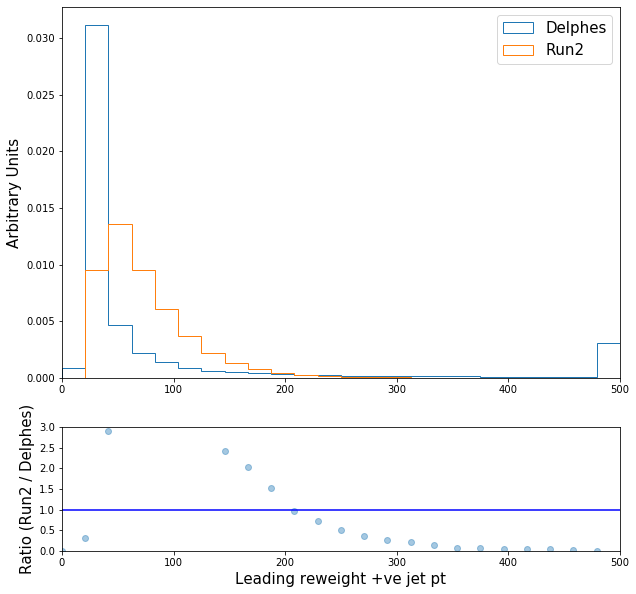

In [23]:
bins = np.linspace(0,500, 25)

fig_style = {
    'figsize': (10, 10),
}

ratio_fig_style = {
    'figsize': (10, 10),
    'gridspec_kw': {'height_ratios': (3, 1)},
}

jet_pt =  (1/jet_pt_rw) * jet_pt 

fig, (ax1, ax2) = plt.subplots(nrows=2, **ratio_fig_style)
ns1, bins1, patches  = ax1.hist(np.clip(jet_pt,  bins[0], bins[-1]),  density=True, histtype='step', bins=bins , label='Delphes')
ns2, bins2, patches  = ax1.hist(np.clip(tt_b_pt, bins[0], bins[-1]), density=True , histtype='step', bins=bins , label='Run2')

ax1.legend(prop={'size': 15}, loc='upper right')
ax1.set_xlim(0, 500)
ax2.scatter(bins[:-1],     # this is what makes it comparable
        ns2 / ns1,     # maybe check for div-by-zero!
        alpha=0.4)

ax1.set_ylabel('Arbitrary Units', fontsize=15)
ax2.set_ylabel('Ratio (Run2 / Delphes)', fontsize=15)
ax2.set_xlabel('Leading reweight +ve jet pt', fontsize=15)
ax2.set_ylim(0,3)
ax2.set_xlim(0,500)
plt.axhline(y=1, color='b', linestyle='-')
plt.show()

In [27]:
jet_dphi = []
for i in range(len(jet_PUPPI_phi)) :
    if (len(jet_PUPPI_phi[i]) > 1) :
        if (jet_PUPPI_pt[i][1] > 30) :
            
            jet4vec  = ROOT.TLorentzVector()
            jet4vec.SetPtEtaPhiM(jet_PUPPI_pt[i][0], jet_PUPPI_eta[i][0], jet_PUPPI_phi[i][0], jet_PUPPI_mass[i][0])

            ajet4vec = ROOT.TLorentzVector()
            ajet4vec.SetPtEtaPhiM(jet_PUPPI_pt[i][1], jet_PUPPI_eta[i][1], jet_PUPPI_phi[i][1], jet_PUPPI_mass[i][1])
        
            jet_dphi.append(abs(jet4vec.DeltaPhi(ajet4vec)))

In [47]:
jet_phi  =  np.array(jet_phi)
ajet_phi =  np.array(ajet_phi)

In [27]:
jet_dphi = []
for i in range(len(jet_PUPPI_phi)) :
    if (len(jet_PUPPI_phi[i]) > 1) :
        if (jet_PUPPI_pt[i][1] > 30) and (abs(jet_PUPPI_eta[i][0]) < 2.5) and (abs(jet_PUPPI_eta[i][1]) < 2.5) :
            
            jet4vec    = ROOT.TLorentzVector()
            jet_rw_pt  = reweight(jet_PUPPI_pt[i][0])
            jet4vec.SetPtEtaPhiM(jet_rw_pt, jet_PUPPI_eta[i][0], jet_PUPPI_phi[i][0], jet_PUPPI_mass[i][0])

            ajet4vec   = ROOT.TLorentzVector()
            ajet_rw_pt = reweight(jet_PUPPI_pt[i][1])
            ajet4vec.SetPtEtaPhiM(ajet_rw_pt, jet_PUPPI_eta[i][1], jet_PUPPI_phi[i][1], jet_PUPPI_mass[i][1])
        
            jet_dphi.append(abs(jet4vec.DeltaPhi(ajet4vec)))

Text(0, 0.5, 'Arbitrary Units')

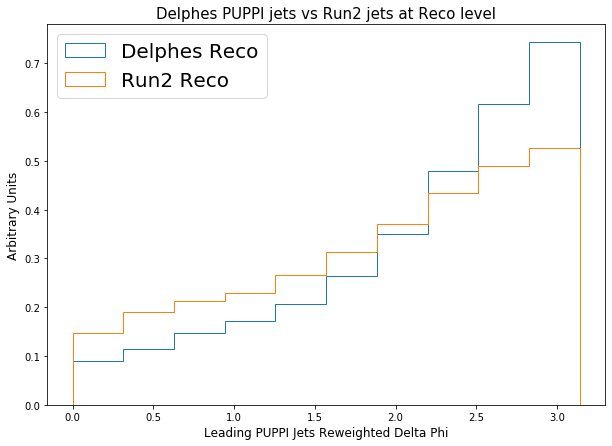

In [28]:
fig_style = {
    'figsize': (10, 7),
}

fig, ax = plt.subplots(**fig_style)

plt.title('Delphes PUPPI jets vs Run2 jets at Reco level', fontsize=15)
plt.hist(jet_dphi, histtype='step', label = 'Delphes Reco', density=True)
plt.hist(tt_bbbar_dphi, histtype='step' , label = 'Run2 Reco', density=True)

ax.legend(prop={'size': 20}, loc='upper left')
plt.xlabel('Leading PUPPI Jets Reweighted Delta Phi', fontsize=12)
plt.ylabel('Arbitrary Units', fontsize=12)

In [21]:
gen_jet_charge

<JaggedArray [[0 1 0 -1 0] [1 1 -1 2 -2] [-2 0 -1 2] ... [-3 0 -3 ... -1 4 0] [-1 0 1 ... -1 -2 0] [0 1 1 ... 0 -3 0]] at 0x0003c298d400>

In [68]:
gen_part_pid[4]

array([   2,   -2,    6,   -6,    6,   -6,    6,   -6,    6,   -6,    6,
         -6,    6,    6,   -6,    6,    6,   -6,    6,   -6,   22,    5,
         24,   -5,  -24,   -5,  -24,   -5,   -5,   -5,   -5,  -11,   12,
         13,  -14,   13,   22,  -14,  511,    5, -523,   22,   22,   22,
         22,   22,   22,   22, -521,   22,   22,   22,   22,   22,   22,
         22,   22,   22,   22,   22,   22,   22,   22,   22,   22,   22,
         22,   22,   22,   22,   22,   22,   22,   22,   22,   22,   22,
         22,   22,   22,   22,   22,   22,   22,   22,   22,   22,   22,
         22,   22,   22,   22,   22,   22,   22,   22,   22,   22,   22,
         22,   22,   22,   22,   22,   22,   22,   22,   22,   22,   22,
         22,   22,   22,   22,   22,   22,   22,   22,   22,   22,   22,
         22,   22,   22,   22,   11,  -11,   22,   22,   22,   22,   22,
         22,   22,   22,   22,   22,   22,   22,   22,   22,   22,   22,
         22,   22,   22,   22,   22,   22,   22,   

In [36]:
jet_PUPPI_btag

<JaggedArray [[23 0 0 1 57] [0 58 0 43 0] [0 57 19 0] ... [43 61 0 ... 0 0 8] [1 0 59 ... 1 8 8] [27 0 0 ... 0 8 0]] at 0x0003bf69d278>